In [10]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

In [7]:
file = "/Users/rajdipingale/Downloads/Geo India/IND_adm1.shp"

In [8]:
map_df = gpd.read_file(file)
map_df_copy = gpd.read_file(file)

In [9]:
map_df.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,VARNAME_1,NL_NAME_1,HASC_1,CC_1,TYPE_1,ENGTYPE_1,VALIDFR_1,VALIDTO_1,REMARKS_1,Shape_Leng,Shape_Area,geometry
0,105,IND,India,1287,Andaman and Nicobar,Andaman & Nicobar Islands|Andaman et Nicobar|I...,None,IN.AN,None,Union Territor,Union Territory,None,None,None,33.514047,0.630484,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,105,IND,India,1288,Andhra Pradesh,None,None,IN.AP,None,State,State,None,None,None,58.916311,23.281297,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."
2,105,IND,India,1289,Arunachal Pradesh,Agence de la Frontisre du Nord-Est(French-obso...,None,IN.AR,None,State,State,None,None,None,24.851991,7.529301,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
3,105,IND,India,1290,Assam,None,None,IN.AS,None,State,State,None,None,None,28.542964,7.091458,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
4,105,IND,India,1291,Bihar,None,None,IN.BR,None,State,State,None,None,None,25.980049,8.475058,"POLYGON ((84.11342 27.51544, 84.11881 27.51397..."


In [21]:
data = pd.read_excel("/Users/rajdipingale/Documents/EV_powerConsumption (1).xlsx")

In [23]:
data.head()

,States,Unnamed: 1,Power Consumption(in Mega Units KWh*10^6),Subsidy for charging station establishment,EV buying incentives to public,EV distribution target mentioned in policy,Power Plant setting target mentioned in policy,Unnamed: 7,Number of Public charging stations
0,Delhi,NaN,90.738,Yes,Yes,Yes,Yes,NaN,228
1,Rajasthan,NaN,0.056,Yes,Yes,No,No,NaN,19
2,Haryana,NaN,0.041,Yes,Yes,Yes,Yes,NaN,47
3,Gujrat,NaN,21.217,Yes,Yes,Yes,Yes,NaN,38
4,Karnataka,NaN,0.025,Yes,Yes,Yes,Yes,NaN,37


In [26]:
data_df = pd.DataFrame([data["States"],data["Power Consumption(in Mega Units KWh*10^6)"],data["Subsidy for charging station establishment"],data["EV buying incentives to public"],data["EV distribution target mentioned in policy"],data["Power Plant setting target mentioned in policy"],data["Number of Public charging stations"]])

In [27]:
data_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
States,Delhi,Rajasthan,Haryana,Gujrat,Karnataka,Arunachal Pradesh,Telangana,Kerala,Bihar,West Bengal,...,Nagaland,Odisha,Sikkim,Tripura,Maharashtra,Jharkhand,Himachal Pradesh,Goa,Madhya Pradesh,Manipur
Power Consumption(in Mega Units KWh*10^6),90.738,0.056,0.041,21.217,0.025,0.0,0.274,0.49,0.01,2.554,...,0.0,0.0,0.0,0.0,42.21,0.0,0.0,0.0,0.0,0.0
Subsidy for charging station establishment,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,No,Yes,No,No,Yes,Yes,No
EV buying incentives to public,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,No,Yes,No,No,Yes,Yes,No
EV distribution target mentioned in policy,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,...,No,Yes,No,No,Yes,No,No,Yes,Yes,No
Power Plant setting target mentioned in policy,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,...,No,Yes,No,No,Yes,No,No,Yes,Yes,No
Number of Public charging stations,228,19,47,38,37,0,60,21,0,19,...,0,0,0,0,71,5,0,6,12,0


In [28]:
df_new = pd.DataFrame.transpose(data_df)

In [33]:
df_new.head()

,States,Power Consumption(in Mega Units KWh*10^6),Subsidy for charging station establishment,EV buying incentives to public,EV distribution target mentioned in policy,Power Plant setting target mentioned in policy,Number of Public charging stations
0,Delhi,90.738,Yes,Yes,Yes,Yes,228
1,Rajasthan,0.056,Yes,Yes,No,No,19
2,Haryana,0.041,Yes,Yes,Yes,Yes,47
3,Gujrat,21.217,Yes,Yes,Yes,Yes,38
4,Karnataka,0.025,Yes,Yes,Yes,Yes,37


## Bar graph of number of charging stations in states

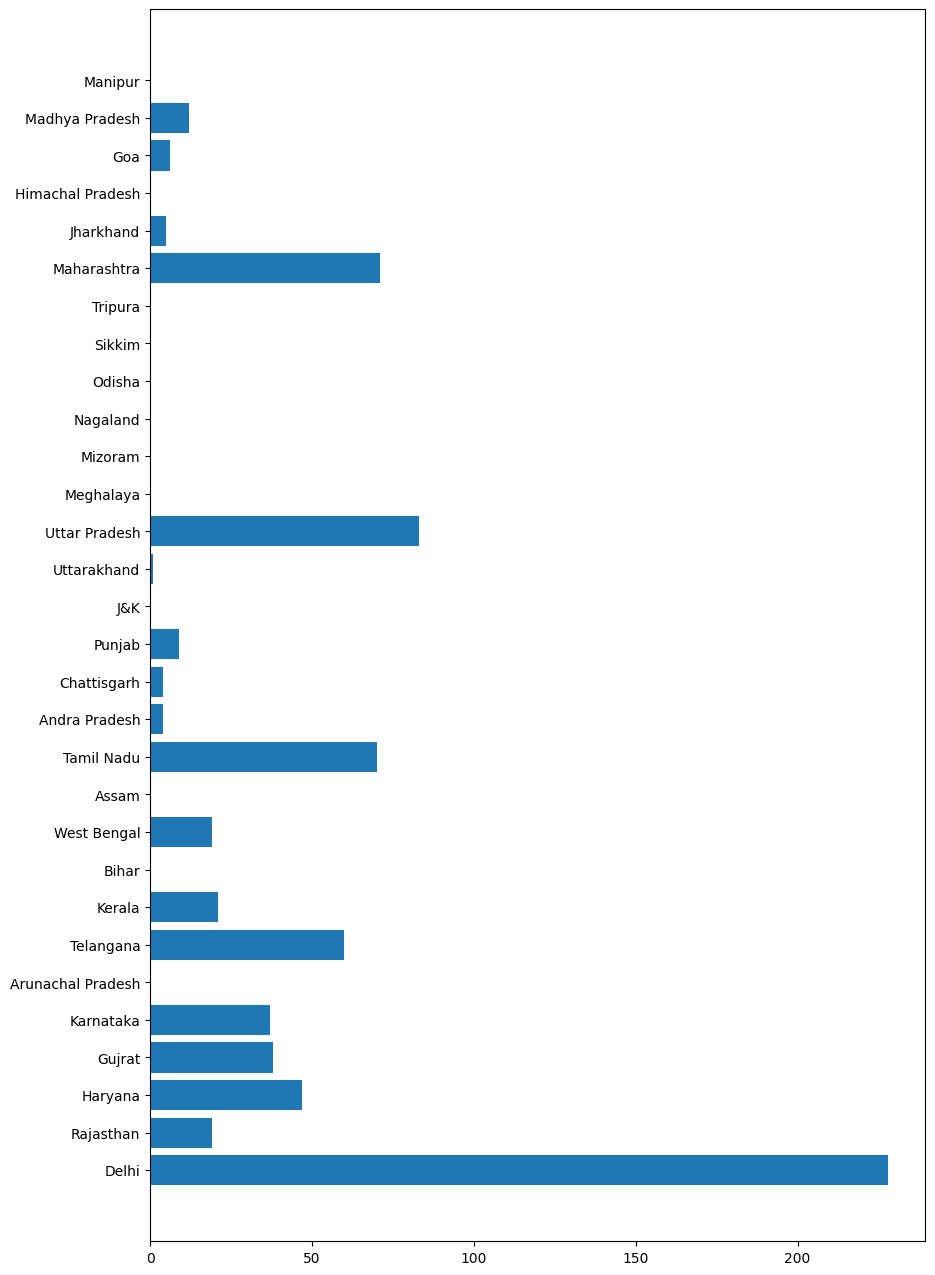

In [32]:
fig,ax = plt.subplots(figsize = (10,16))
name = df_new["States"]
ev = df_new["Number of Public charging stations"]
ax.barh(name,ev);

## Pie chart visulaization

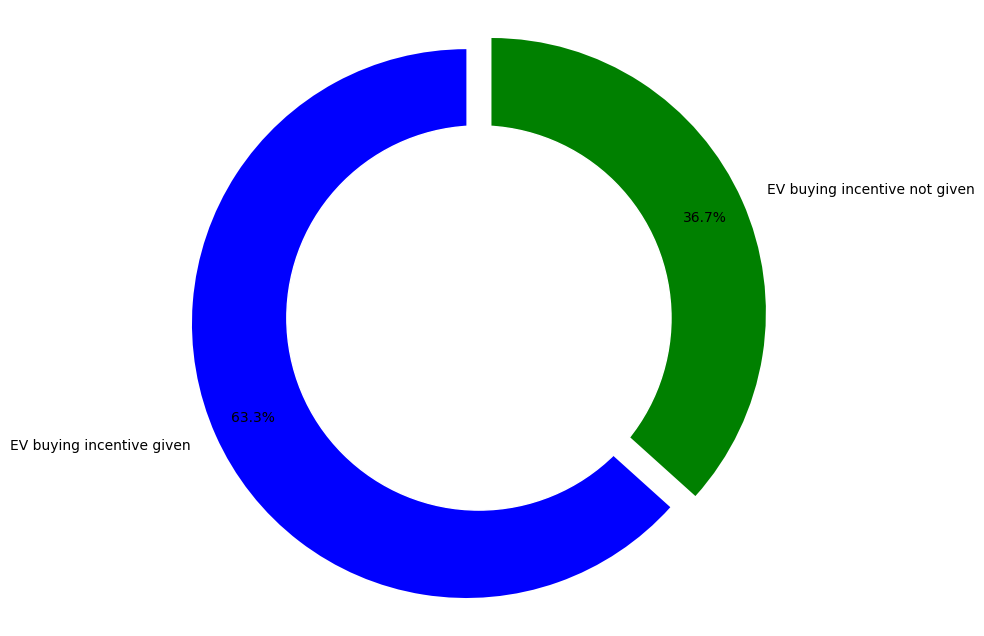

In [35]:
#Getting labels and data
df = df_new.copy()
df.rename(columns = {"EV buying incentives to public":"Incentive"},inplace = True)
labels = ['EV buying incentive given','EV buying incentive not given']
incentive_status = [df.query("Incentive== 'Yes'").Incentive.count(),df.query("Incentive== 'No'").Incentive.count()]

colors = ["blue","green"]
explode = [0.05,0.05]
plt.figure(figsize = (8,8))
my_circle = plt.Circle((0,0),0.7,color = "white")
plt.pie(incentive_status,colors = colors,labels = labels,autopct = '%1.1f%%',startangle = 90,pctdistance = 0.85,explode = explode)
p = plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

## Geography wise plots

In [36]:
merged = map_df.set_index('NAME_1').join(df_new.set_index('States')) 

In [37]:
merged

,ID_0,ISO,NAME_0,ID_1,VARNAME_1,NL_NAME_1,HASC_1,CC_1,TYPE_1,ENGTYPE_1,...,REMARKS_1,Shape_Leng,Shape_Area,geometry,Power Consumption(in Mega Units KWh*10^6),Subsidy for charging station establishment,EV buying incentives to public,EV distribution target mentioned in policy,Power Plant setting target mentioned in policy,Number of Public charging stations
NAME_1,,,,,,,,,,,,,,,,,,,,,
Andaman and Nicobar,105,IND,India,1287,Andaman & Nicobar Islands|Andaman et Nicobar|I...,None,IN.AN,None,Union Territor,Union Territory,...,None,33.514047,0.630484,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...",NaN,NaN,NaN,NaN,NaN,NaN
Andhra Pradesh,105,IND,India,1288,None,None,IN.AP,None,State,State,...,None,58.916311,23.281297,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13...",NaN,NaN,NaN,NaN,NaN,NaN
Arunachal Pradesh,105,IND,India,1289,Agence de la Frontisre du Nord-Est(French-obso...,None,IN.AR,None,State,State,...,None,24.851991,7.529301,"POLYGON ((96.15778 29.38310, 96.16380 29.37668...",0.0,No,No,No,No,0
Assam,105,IND,India,1290,None,None,IN.AS,None,State,State,...,None,28.542964,7.091458,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25...",0.0677,No,No,No,No,0
Bihar,105,IND,India,1291,None,None,IN.BR,None,State,State,...,None,25.980049,8.475058,"POLYGON ((84.11342 27.51544, 84.11881 27.51397...",0.01,Yes,Yes,No,No,0
Chandigarh,105,IND,India,1292,None,None,IN.CH,None,Union Territor,Union Territory,...,None,0.514098,0.011125,"POLYGON ((76.77557 30.77605, 76.78094 30.77387...",NaN,NaN,NaN,NaN,NaN,NaN
Chhattisgarh,105,IND,India,1293,None,None,IN.CT,None,State,State,...,None,28.886582,11.790087,"POLYGON ((83.32760 24.09965, 83.34575 24.09707...",NaN,NaN,NaN,NaN,NaN,NaN
Dadra and Nagar Haveli,105,IND,India,1294,DAdra et Nagar Haveli|Dadra e Nagar Haveli,None,IN.DN,None,Union Territor,Union Territory,...,None,1.676937,0.042478,"POLYGON ((73.11888 20.32620, 73.11651 20.31271...",NaN,NaN,NaN,NaN,NaN,NaN
Daman and Diu,105,IND,India,1295,None,None,IN.DD,None,Union Territor,Union Territory,...,None,2.118425,0.048240,"MULTIPOLYGON (((72.86014 20.47096, 72.86340 20...",NaN,NaN,NaN,NaN,NaN,NaN


## Geographical plot of statewise power consumption

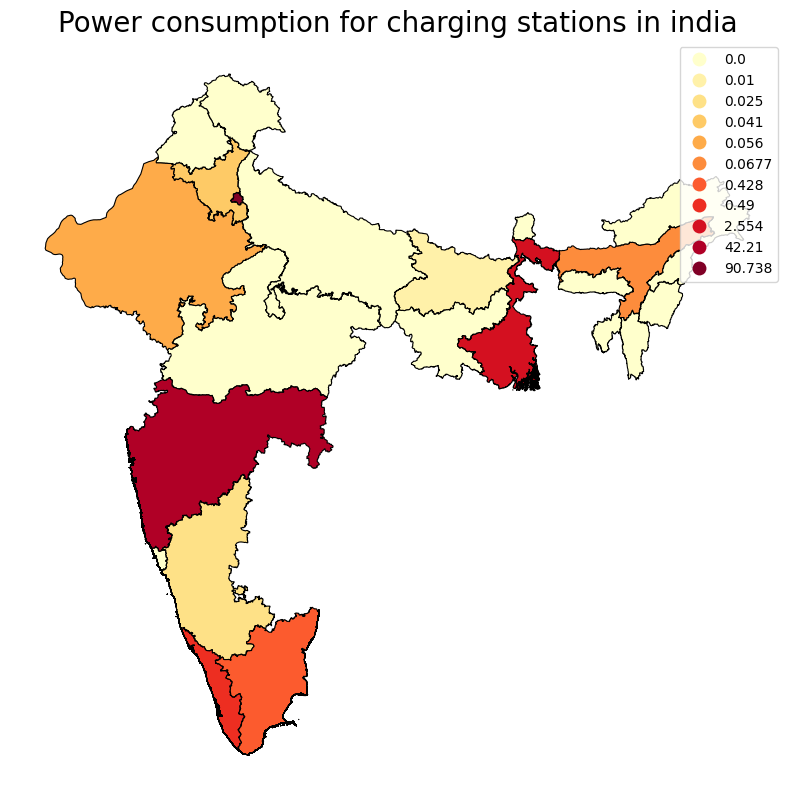

In [38]:
fig,ax = plt.subplots(figsize = (10,10))
ax.axis("off")
ax.set_title('Power consumption for charging stations in india', fontdict={'fontsize': '20', 'fontweight' : '10'})
merged.plot(column = "Power Consumption(in Mega Units KWh*10^6)",cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337]);

## Geographical plot of statewise policy incentives(EV buying incentives)

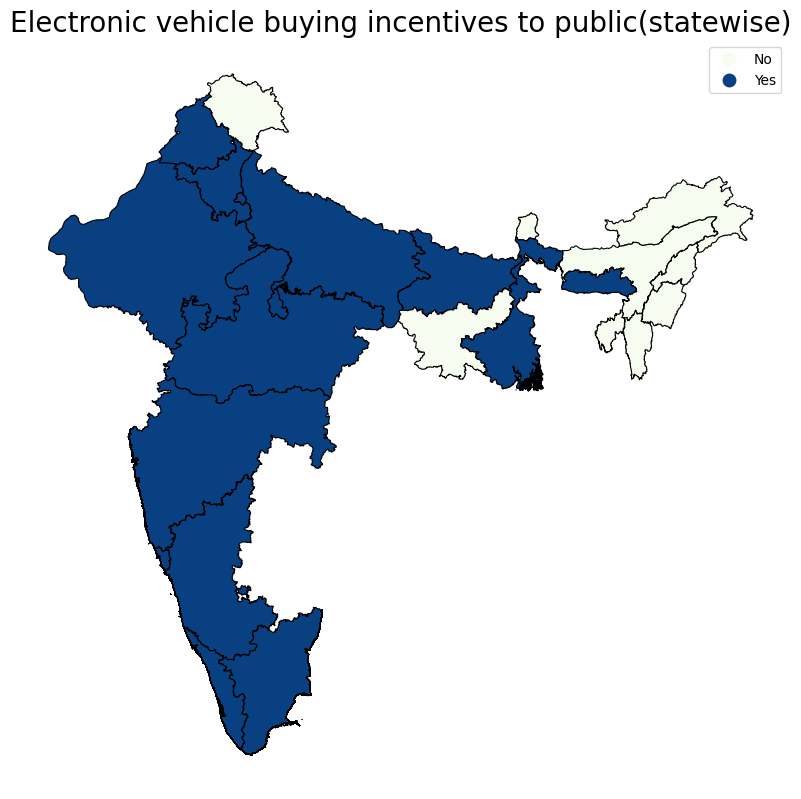

In [42]:
fig,ax = plt.subplots(figsize = (10,10))
ax.axis("off")
ax.set_title('Electronic vehicle buying incentives to public(statewise)', fontdict={'fontsize': '20', 'fontweight' : '10'})
merged.plot(column = "EV buying incentives to public",cmap='GnBu', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337]);

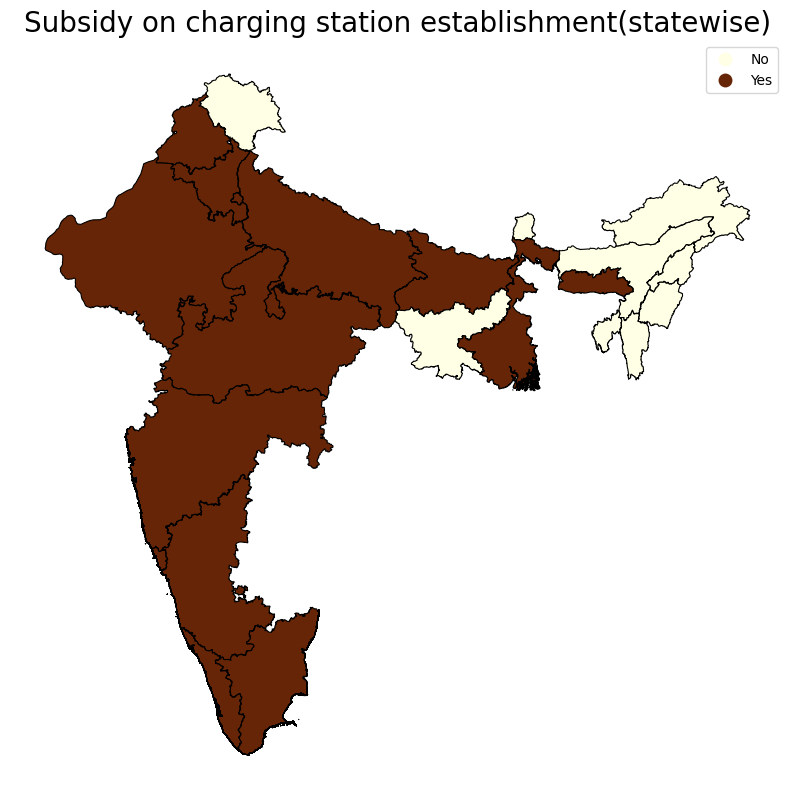

In [41]:
fig,ax = plt.subplots(figsize = (10,10))
ax.axis("off")
ax.set_title('Subsidy on charging station establishment(statewise)', fontdict={'fontsize': '20', 'fontweight' : '10'})
merged.plot(column = "Subsidy for charging station establishment",cmap='YlOrBr', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337]);

## Performing segmentation on the given data

In [49]:
number = LabelEncoder()
df_new["Subsidy for charging station establishment"] = number.fit_transform(df_new["Subsidy for charging station establishment"].astype("str"))
df_new["EV buying incentives to public"] = number.fit_transform(df_new["EV buying incentives to public"].astype("str"))
df_new["EV distribution target mentioned in policy"] = number.fit_transform(df_new["EV distribution target mentioned in policy"].astype("str"))
df_new["Power Plant setting target mentioned in policy"] = number.fit_transform(df_new["Power Plant setting target mentioned in policy"].astype("str"))


In [50]:
df_new

,States,Power Consumption(in Mega Units KWh*10^6),Subsidy for charging station establishment,EV buying incentives to public,EV distribution target mentioned in policy,Power Plant setting target mentioned in policy,Number of Public charging stations
0,Delhi,90.738,1,1,1,1,228
1,Rajasthan,0.056,1,1,0,0,19
2,Haryana,0.041,1,1,1,1,47
3,Gujrat,21.217,1,1,1,1,38
4,Karnataka,0.025,1,1,1,1,37
5,Arunachal Pradesh,0.0,0,0,0,0,0
6,Telangana,0.274,1,1,1,1,60
7,Kerala,0.49,1,1,1,1,21
8,Bihar,0.01,1,1,0,0,0
9,West Bengal,2.554,1,1,1,1,19


## Scaling the above data

In [58]:
df2 = df_new.drop(columns = df_new.columns[0])


In [59]:
SS = StandardScaler()
data_scaled = SS.fit_transform(df2)

In [34]:
data_scaled

array([[ 5.23955435,  4.92575596, -0.9459053 ,  0.9459053 , -0.9459053 ,
         0.9459053 , -1.05718828,  1.05718828, -1.05718828,  1.05718828],
       [-0.26399363, -0.03295261, -0.9459053 ,  0.9459053 , -0.9459053 ,
         0.9459053 ,  0.9459053 , -0.9459053 ,  0.9459053 , -0.9459053 ],
       [-0.26490399,  0.63137198, -0.9459053 ,  0.9459053 , -0.9459053 ,
         0.9459053 , -1.05718828,  1.05718828, -1.05718828,  1.05718828],
       [ 1.02028085,  0.41783908, -0.9459053 ,  0.9459053 , -0.9459053 ,
         0.9459053 , -1.05718828,  1.05718828, -1.05718828,  1.05718828],
       [-0.26587504,  0.3941132 , -0.9459053 ,  0.9459053 , -0.9459053 ,
         0.9459053 , -1.05718828,  1.05718828, -1.05718828,  1.05718828],
       [-0.26739231, -0.4837443 ,  1.05718828, -1.05718828,  1.05718828,
        -1.05718828,  0.9459053 , -0.9459053 ,  0.9459053 , -0.9459053 ],
       [-0.25076307,  0.9398084 , -0.9459053 ,  0.9459053 , -0.9459053 ,
         0.9459053 , -1.05718828,  1.05718828

## Reducing the dimensionality of data

Text(0, 0.5, 'Percentage of Each component')

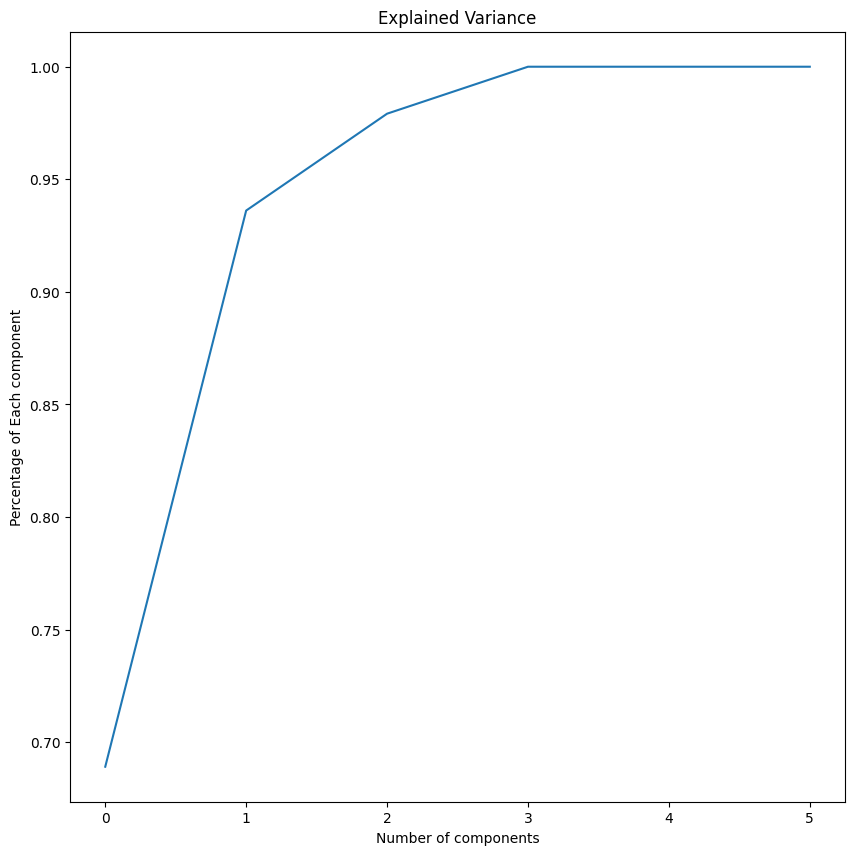

In [62]:
pca = PCA().fit(data_scaled)
plt.figure(figsize = (10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained Variance")
plt.xlabel("Number of components")
plt.ylabel("Percentage of Each component")

In [63]:
pca = PCA(n_components = 3)
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)

In [64]:
data_pca

array([[ 3.97615748,  5.47643478,  0.10128925],
       [-0.46571866, -0.20395839,  1.89354815],
       [ 1.59973516, -0.50893916, -0.1320127 ],
       [ 1.80537778,  0.20056774, -0.08934913],
       [ 1.53140898, -0.64377687, -0.13435004],
       [-2.50469895,  0.3868176 , -0.16841147],
       [ 1.6912343 , -0.32532991, -0.12852587],
       [ 1.42827182, -0.84028114, -0.13705333],
       [-0.59573508, -0.46076172,  1.88907425],
       [ 1.44066668, -0.78619521, -0.1331536 ],
       [-2.50384549,  0.38947207, -0.16826845],
       [ 1.76130018, -0.18508131, -0.12589699],
       [ 1.31257365, -1.06808588, -0.14095033],
       [-2.47744915,  0.44050175, -0.16749006],
       [ 1.34034527, -1.02054614, -0.14085276],
       [-2.50469895,  0.3868176 , -0.16841147],
       [ 1.28584568, -1.12791443, -0.14269559],
       [ 1.84446643, -0.02738941, -0.12380659],
       [ 1.27903323, -1.14133547, -0.14292594],
       [-2.50469895,  0.3868176 , -0.16841147],
       [-2.50469895,  0.3868176 , -0.168

## K means clustering by considering all variables as segmentation variables

Text(0.5, 1.0, 'Elbow method for optimal K')

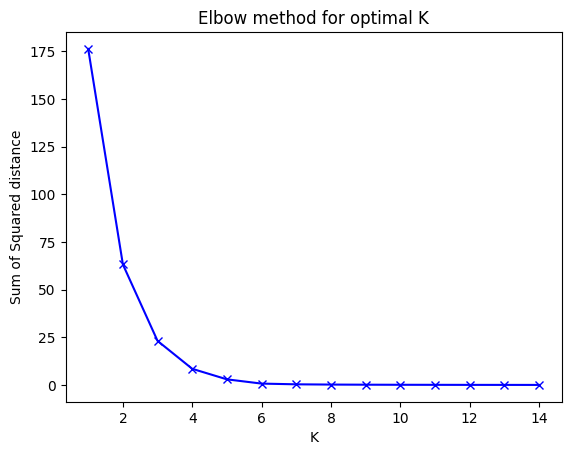

In [65]:
import warnings 
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
Sum_of_squared_distance = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(data_pca)
    Sum_of_squared_distance.append(km.inertia_)
plt.plot(K,Sum_of_squared_distance,"bx-")
plt.xlabel("K")
plt.ylabel("Sum of Squared distance")
plt.title("Elbow method for optimal K")

In [94]:
#elbow formation optimal = 3
kmeans = KMeans(n_clusters = 3,init = "k-means++",n_init = 10,max_iter = 1000,tol = 0.0001,verbose = 0,random_state = None,copy_x = True,
               algorithm = "auto")
y_means = kmeans.fit_predict(data_pca)

In [95]:
y_means

array([0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 1, 2], dtype=int32)

## Attaching this cluster information with the data

In [96]:
df_new["cluster"] = y_means

In [97]:
df_new

,States,Power Consumption(in Mega Units KWh*10^6),Subsidy for charging station establishment,EV buying incentives to public,EV distribution target mentioned in policy,Power Plant setting target mentioned in policy,Number of Public charging stations,cluster
0,Delhi,90.738,1,1,1,1,228,0
1,Rajasthan,0.056,1,1,0,0,19,2
2,Haryana,0.041,1,1,1,1,47,1
3,Gujrat,21.217,1,1,1,1,38,1
4,Karnataka,0.025,1,1,1,1,37,1
5,Arunachal Pradesh,0.0,0,0,0,0,0,2
6,Telangana,0.274,1,1,1,1,60,1
7,Kerala,0.49,1,1,1,1,21,1
8,Bihar,0.01,1,1,0,0,0,2
9,West Bengal,2.554,1,1,1,1,19,1


In [98]:
merged = map_df.set_index('NAME_1').join(df_new.set_index('States'))

In [99]:
merged

,ID_0,ISO,NAME_0,ID_1,VARNAME_1,NL_NAME_1,HASC_1,CC_1,TYPE_1,ENGTYPE_1,...,Shape_Leng,Shape_Area,geometry,Power Consumption(in Mega Units KWh*10^6),Subsidy for charging station establishment,EV buying incentives to public,EV distribution target mentioned in policy,Power Plant setting target mentioned in policy,Number of Public charging stations,cluster
NAME_1,,,,,,,,,,,,,,,,,,,,,
Andaman and Nicobar,105,IND,India,1287,Andaman & Nicobar Islands|Andaman et Nicobar|I...,None,IN.AN,None,Union Territor,Union Territory,...,33.514047,0.630484,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andhra Pradesh,105,IND,India,1288,None,None,IN.AP,None,State,State,...,58.916311,23.281297,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arunachal Pradesh,105,IND,India,1289,Agence de la Frontisre du Nord-Est(French-obso...,None,IN.AR,None,State,State,...,24.851991,7.529301,"POLYGON ((96.15778 29.38310, 96.16380 29.37668...",0.0,0.0,0.0,0.0,0.0,0,2.0
Assam,105,IND,India,1290,None,None,IN.AS,None,State,State,...,28.542964,7.091458,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25...",0.0677,0.0,0.0,0.0,0.0,0,2.0
Bihar,105,IND,India,1291,None,None,IN.BR,None,State,State,...,25.980049,8.475058,"POLYGON ((84.11342 27.51544, 84.11881 27.51397...",0.01,1.0,1.0,0.0,0.0,0,2.0
Chandigarh,105,IND,India,1292,None,None,IN.CH,None,Union Territor,Union Territory,...,0.514098,0.011125,"POLYGON ((76.77557 30.77605, 76.78094 30.77387...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chhattisgarh,105,IND,India,1293,None,None,IN.CT,None,State,State,...,28.886582,11.790087,"POLYGON ((83.32760 24.09965, 83.34575 24.09707...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dadra and Nagar Haveli,105,IND,India,1294,DAdra et Nagar Haveli|Dadra e Nagar Haveli,None,IN.DN,None,Union Territor,Union Territory,...,1.676937,0.042478,"POLYGON ((73.11888 20.32620, 73.11651 20.31271...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
Daman and Diu,105,IND,India,1295,None,None,IN.DD,None,Union Territor,Union Territory,...,2.118425,0.048240,"MULTIPOLYGON (((72.86014 20.47096, 72.86340 20...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visulaizing the number of clusters on geographical plot

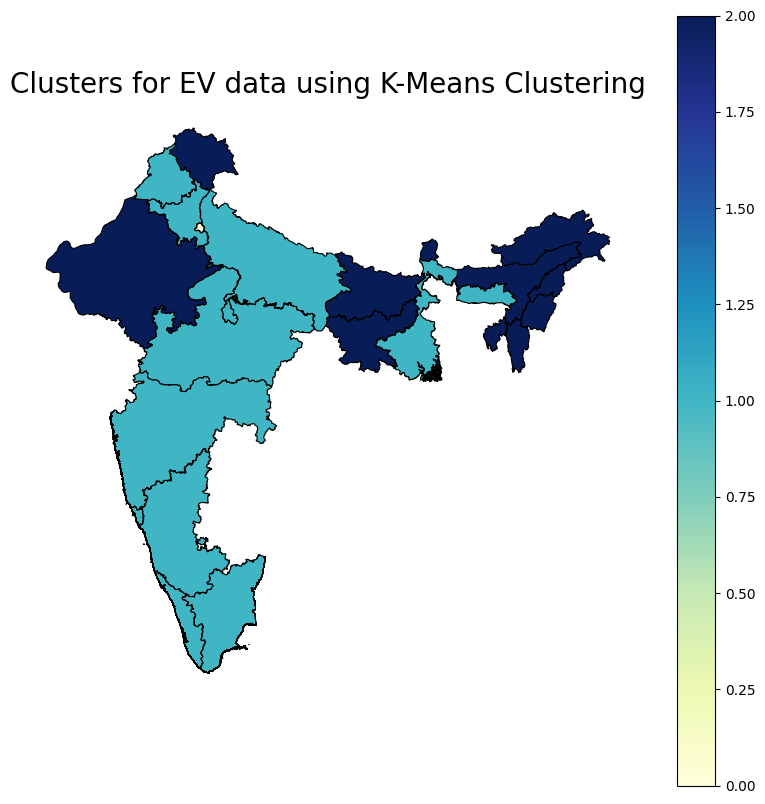

In [100]:
fig,ax = plt.subplots(figsize = (10,10))
ax.axis("off")
ax.set_title('Clusters for EV data using K-Means Clustering', fontdict={'fontsize': '20', 'fontweight' : '10'})
merged.plot(column = "cluster",cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337]);

## Plotiing the effect of dependency of charging stations and their power consumption on the data

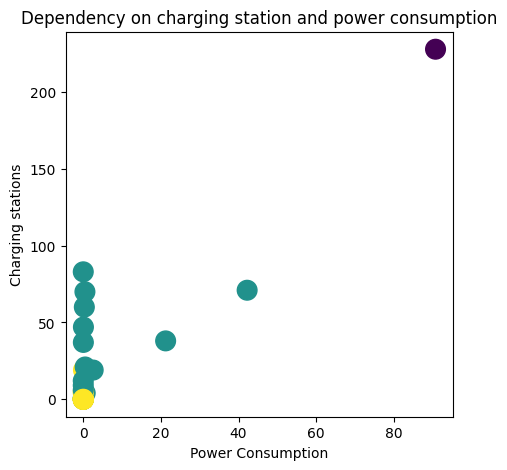

In [101]:
plt.figure(figsize = (5,5))
plt.scatter(x = 'Power Consumption(in Mega Units KWh*10^6)',y = 'Number of Public charging stations',data = df_new,c = y_means,s = 200)
plt.xlabel("Power Consumption")
plt.ylabel("Charging stations")
plt.title("Dependency on charging station and power consumption")
plt.show()

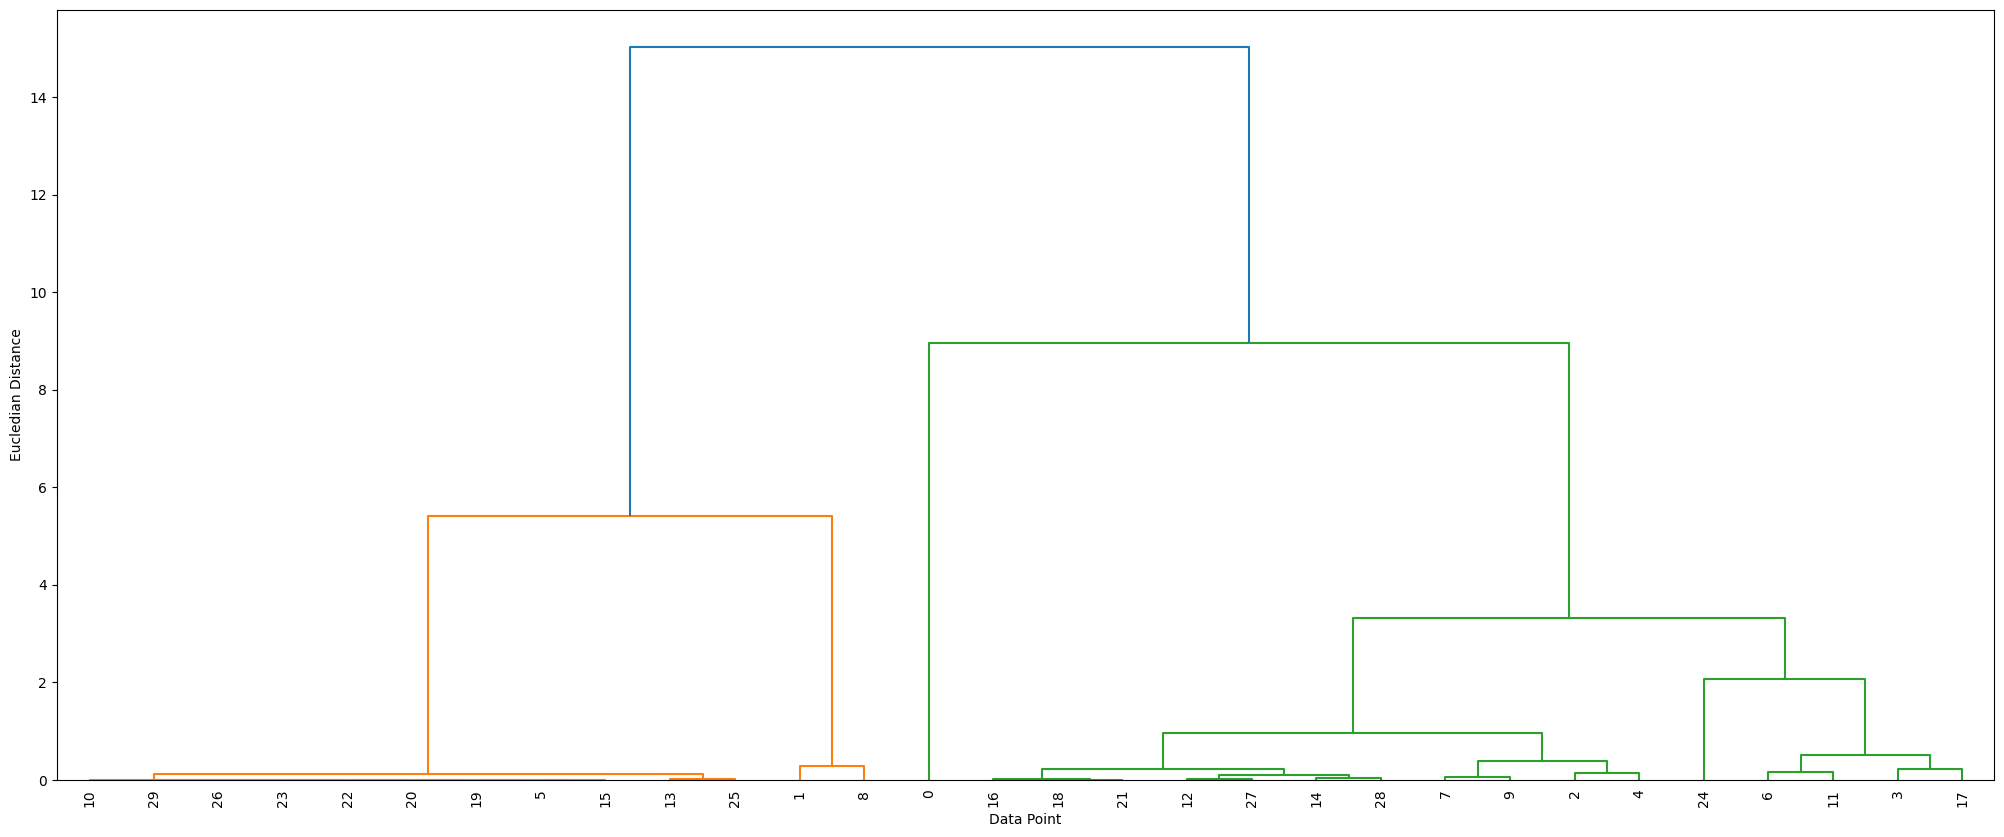

In [102]:
y_hier = linkage(data_pca,method = "ward")
plt.figure(figsize = (25,10))
dendrogram(y_hier,leaf_rotation = 90)
plt.xlabel("Data Point")
plt.ylabel("Eucledian Distance")
plt.show()

In [103]:
from sklearn.cluster import AgglomerativeClustering
hierarical_cluster = AgglomerativeClustering(n_clusters = 4,affinity = "euclidean", linkage = "ward")
data_predict = hierarical_cluster.fit_predict(data_pca)

In [104]:
df_new["cluster"] = data_predict

In [105]:
df_new

,States,Power Consumption(in Mega Units KWh*10^6),Subsidy for charging station establishment,EV buying incentives to public,EV distribution target mentioned in policy,Power Plant setting target mentioned in policy,Number of Public charging stations,cluster
0,Delhi,90.738,1,1,1,1,228,2
1,Rajasthan,0.056,1,1,0,0,19,1
2,Haryana,0.041,1,1,1,1,47,0
3,Gujrat,21.217,1,1,1,1,38,0
4,Karnataka,0.025,1,1,1,1,37,0
5,Arunachal Pradesh,0.0,0,0,0,0,0,3
6,Telangana,0.274,1,1,1,1,60,0
7,Kerala,0.49,1,1,1,1,21,0
8,Bihar,0.01,1,1,0,0,0,1
9,West Bengal,2.554,1,1,1,1,19,0


In [106]:
merged = map_df.set_index('NAME_1').join(df_new.set_index('States'))

## Visulaizing the number of clusters through agglomeratavie clustering

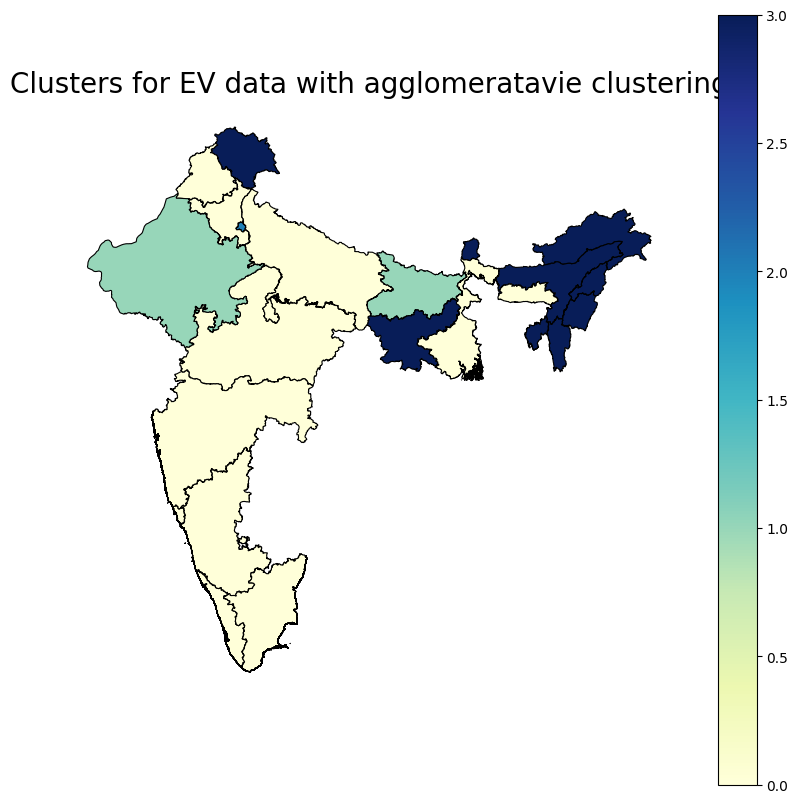

In [107]:
fig,ax = plt.subplots(figsize = (10,10))
ax.axis("off")
ax.set_title('Clusters for EV data with agglomeratavie clustering', fontdict={'fontsize': '20', 'fontweight' : '10'})
merged.plot(column = "cluster",cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337]);

## Clustering by fitting GMM on PCA data

Text(0.5, 0, 'Number of components')

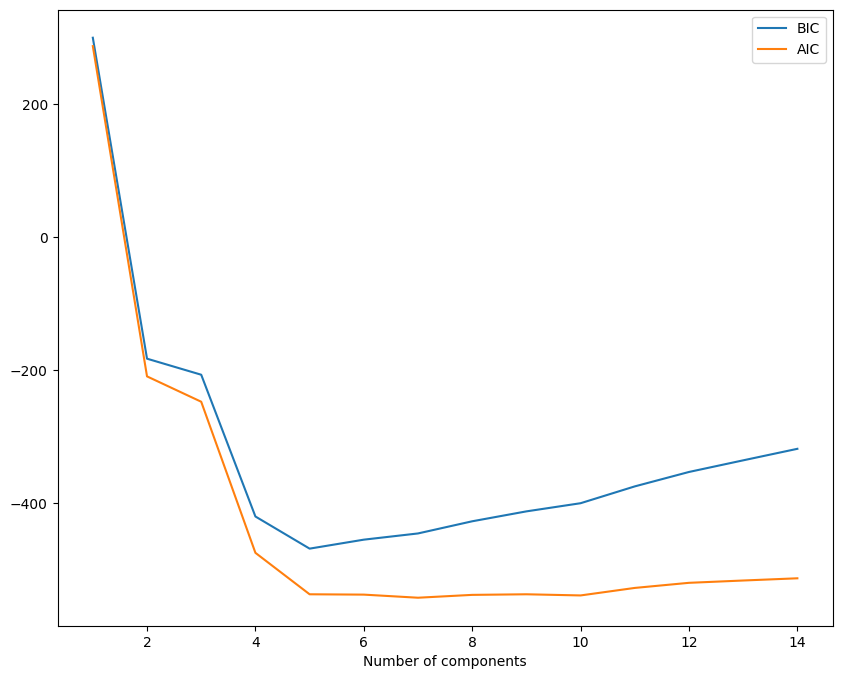

In [109]:
n_components = np.arange(1,15)
models = [GaussianMixture(n,covariance_type = "full",random_state = 0).fit(data_pca) for n in n_components]
plt.figure(figsize = (10,8))
plt.plot(n_components,[m.bic(data_pca) for m in models],label = 'BIC')
plt.plot(n_components,[m.aic(data_pca) for m in models],label = 'AIC')
plt.legend(loc = "best")
plt.xlabel("Number of components")

## We can see that BIC predicts around 5 components of the data

In [110]:
gmm = GaussianMixture(n_components = 5)
gmm.fit(data_pca)

GaussianMixture(n_components=5)

In [111]:
y_predict = gmm.predict(data_pca)

In [112]:
df_new["cluster"] = y_predict

In [113]:
y_predict

array([2, 3, 1, 4, 1, 0, 1, 1, 3, 4, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 4, 0, 0, 1, 1, 0])

In [114]:
merged = map_df.set_index('NAME_1').join(df_new.set_index('States'))

## Visualizing segments through Gaussian Mixture Models

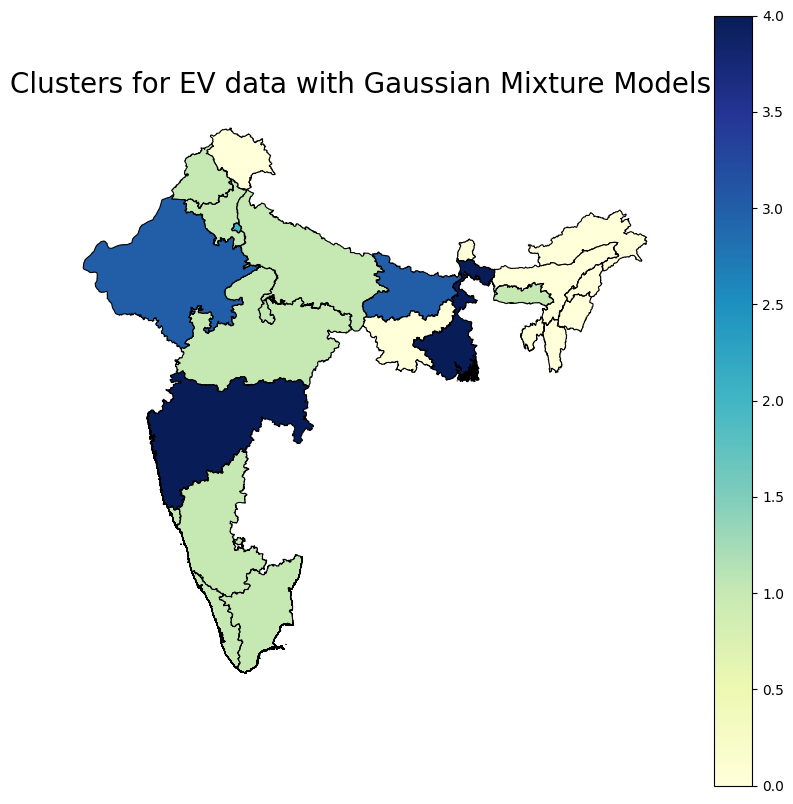

In [115]:
fig,ax = plt.subplots(figsize = (10,10))
ax.axis("off")
ax.set_title('Clusters for EV data with Gaussian Mixture Models ', fontdict={'fontsize': '20', 'fontweight' : '10'})
merged.plot(column = "cluster",cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337]);